# 1- Library Import

In [4]:
# importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings as wrn
from datetime import datetime
wrn.filterwarnings('ignore')

# 2- Read dataSet

In [5]:
# Defining dataSet csv path
filePath="C:\\Users\\ASUS\BITSPilani_Projects\\Assignment & Mini Project\\Module_01_Regression\\RegressionMiniProject01_LuggageBagsCostPredictionModel\\Dataset - Mini Project.csv"
# Loading dataSet
dataSet=pd.read_csv(filePath)
# Checking dataframe shape
print(dataSet.shape)
# checking dataframe type
print(type(dataSet))

(159, 6)
<class 'pandas.core.frame.DataFrame'>


# 3- EDA <Exploratory Data Analysis>

## 3.1- Incpect the data

In [6]:
# Checking quick overview of the dataSet
print(dataSet.head())
# Checking descriptive statistic of the dataSet
print(dataSet.describe())
#checking summary of the dataSet
print(dataSet.info())

    Cost  Weight  Weight1  Length   Height   Width
0  242.0    23.2     25.4    30.0  11.5200  4.0200
1  290.0    24.0     26.3    31.2  12.4800  4.3056
2  340.0    23.9     26.5    31.1  12.3778  4.6961
3  363.0    26.3     29.0    33.5  12.7300  4.4555
4  430.0    26.5     29.0    34.0  12.4440  5.1340
              Cost      Weight     Weight1      Length      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.95

## 3.2- Check for missing , duplicates & unique values

In [7]:
#Calculating the number of missing values in each column
print(dataSet.isnull().sum())
# Handeling missing values
print(dataSet.dropna())
# Dropping Duplicates if exists
dataSet_duplicate = dataSet.drop_duplicates()
print(dataSet_duplicate.shape)
# Checking unique values columswise
print(dataSet.nunique())

Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64
      Cost  Weight  Weight1  Length   Height   Width
0    242.0    23.2     25.4    30.0  11.5200  4.0200
1    290.0    24.0     26.3    31.2  12.4800  4.3056
2    340.0    23.9     26.5    31.1  12.3778  4.6961
3    363.0    26.3     29.0    33.5  12.7300  4.4555
4    430.0    26.5     29.0    34.0  12.4440  5.1340
..     ...     ...      ...     ...      ...     ...
154   12.2    11.5     12.2    13.4   2.0904  1.3936
155   13.4    11.7     12.4    13.5   2.4300  1.2690
156   12.2    12.1     13.0    13.8   2.2770  1.2558
157   19.7    13.2     14.3    15.2   2.8728  2.0672
158   19.9    13.8     15.0    16.2   2.9322  1.8792

[159 rows x 6 columns]
(159, 6)
Cost       101
Weight     116
Weight1     93
Length     124
Height     154
Width      152
dtype: int64


## 3.3- Univirate analysis

### 3.3.1- Histogram Plot

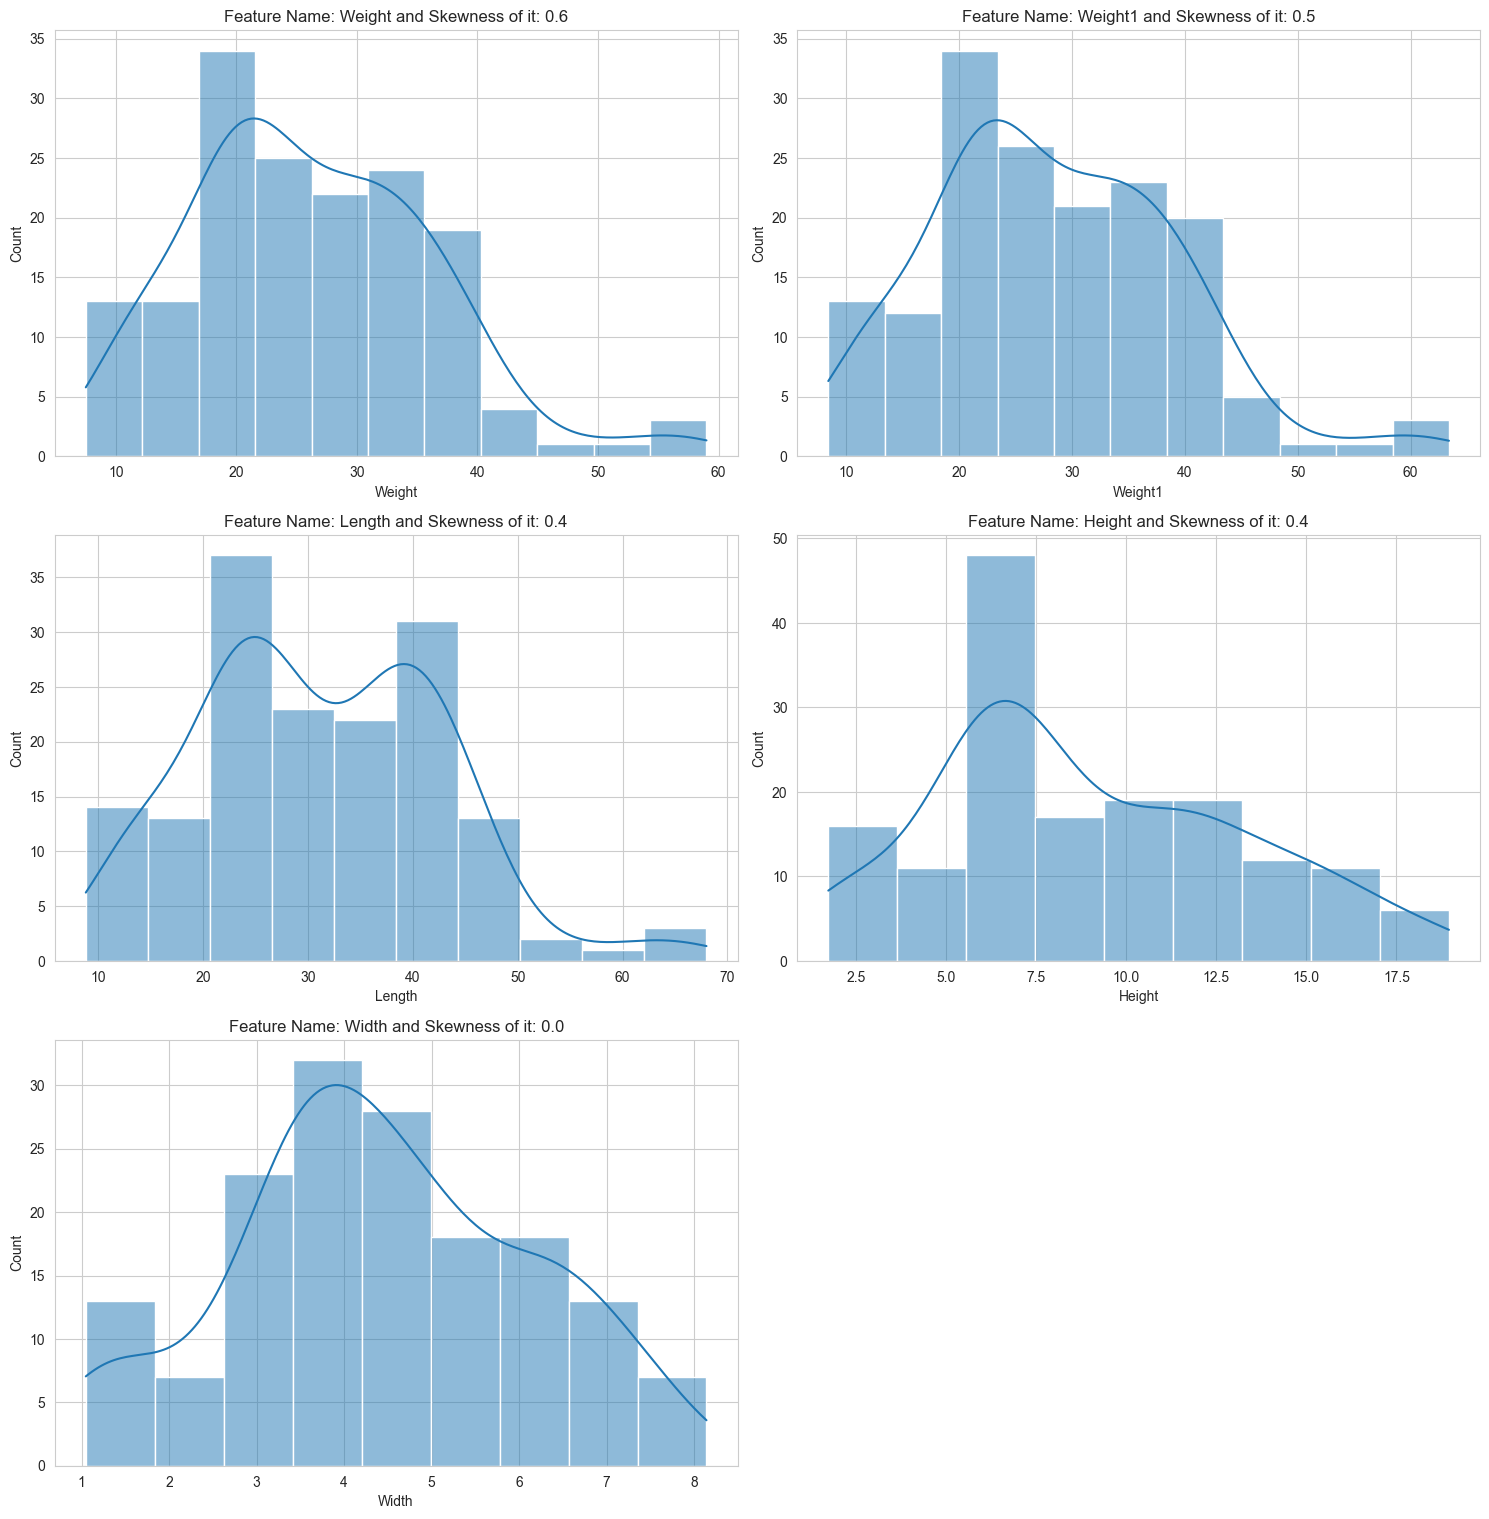

skewness and histogram shows that except Widht column all the columns are skewed \ & do not follow perfectly normal distribution 


In [8]:
# Set the parameters that control the general style of the plots.
sbn.set_style(style="whitegrid") 
#dropping dependent feature column
X=dataSet.drop('Cost',axis=1)
# Selecting all independent feature columns names 
columns=X.columns
#Building Histogram plot for each independent features
plt.figure(figsize=(15, 30) )
for index, columns_name in enumerate(columns, 1): 
    plt.subplot(6, 2,index) 
    sbn.histplot(X[columns_name], kde=True)
    skewness = round(X[columns_name].skew(),1)
    plt.title("Feature Name: {} and Skewness of it: {}".format(columns_name,skewness))
plt.tight_layout()
plt.show()
print("skewness and histogram shows that except Widht column all the columns are skewed \ & do not follow perfectly normal distribution ")

### 3.3.2- Box Plot

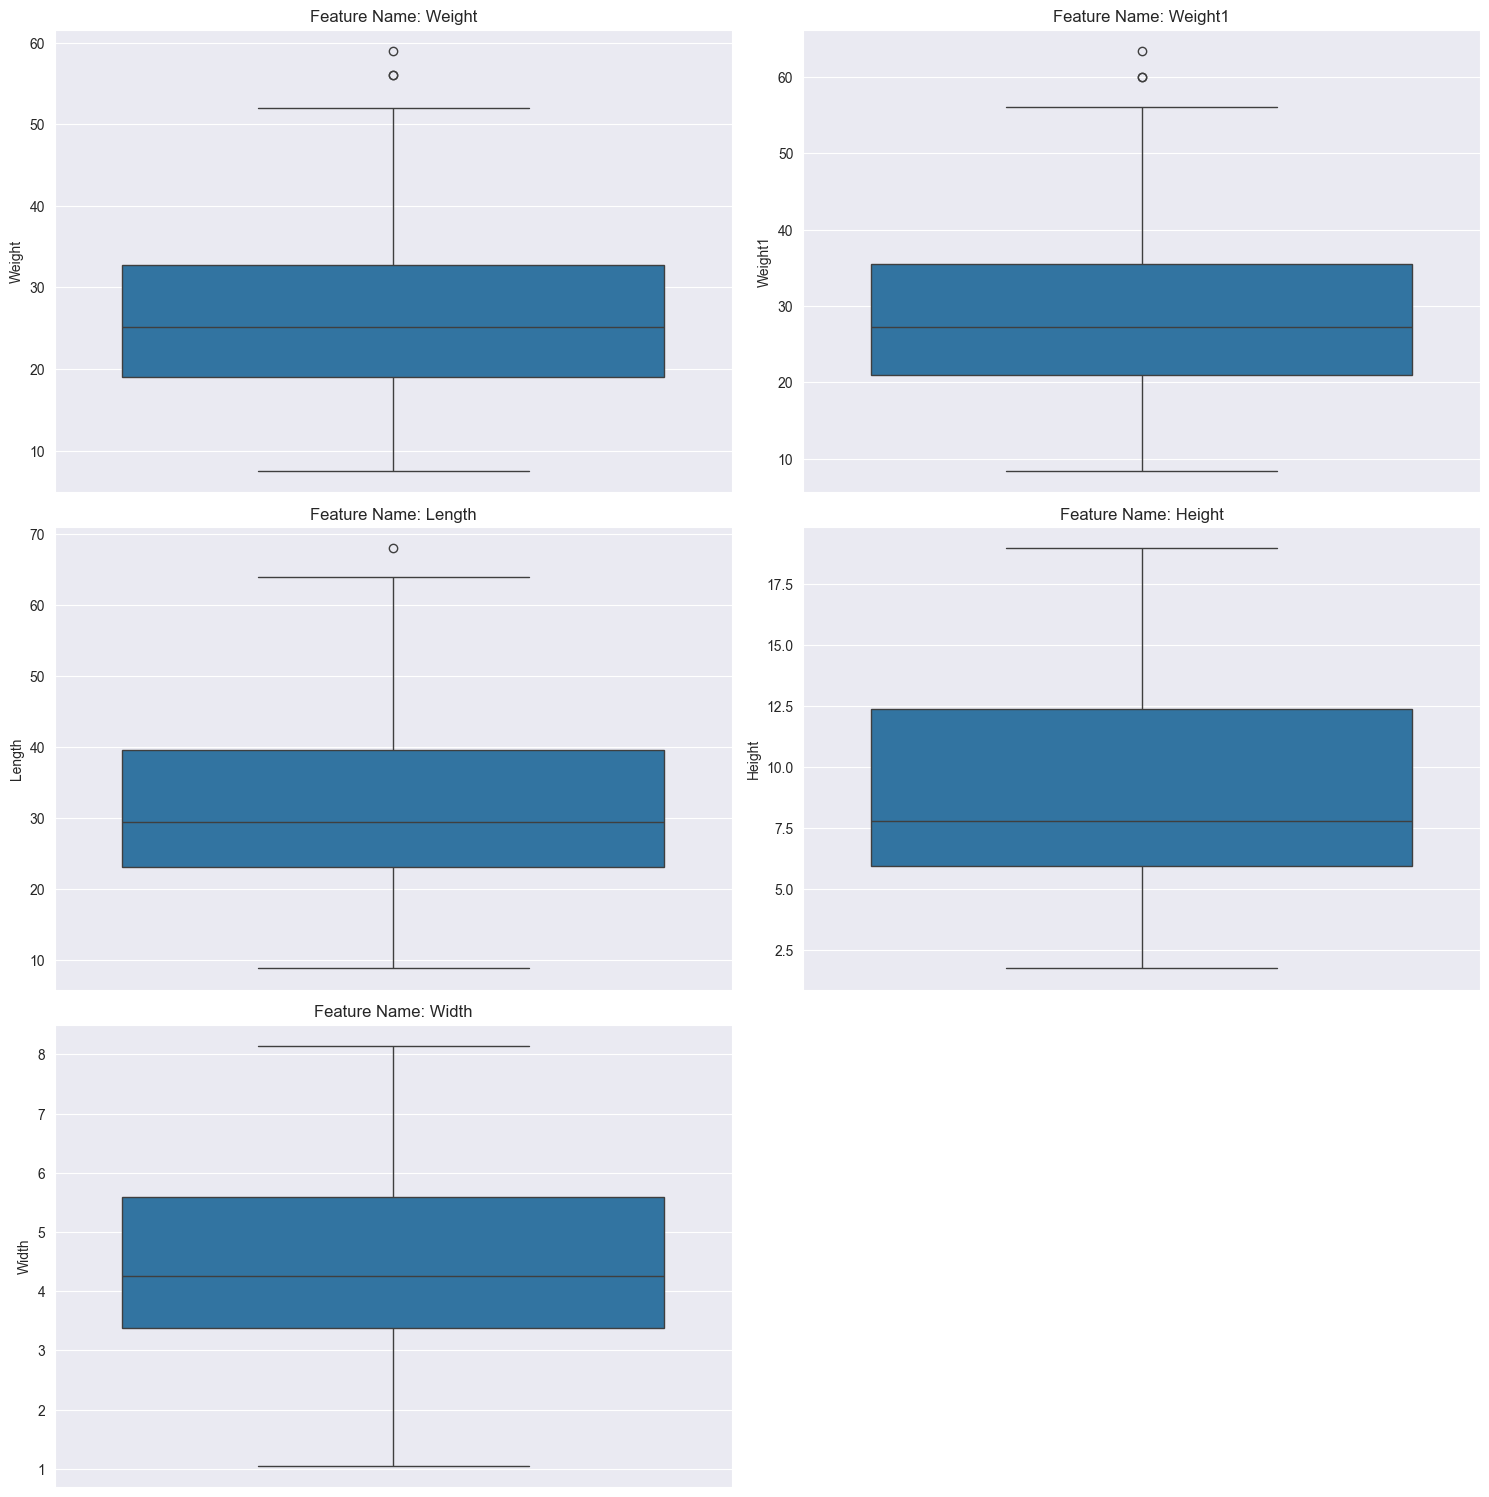

In [9]:
# Set the parameters that control the general style of the plots.
sbn.set_style("darkgrid") 
#dropping dependent feature column
X=dataSet.drop('Cost',axis=1)
# Selecting all independent feature columns names 
columns=X.columns
#Building Box plot for each independent features 
plt.figure(figsize=(15, 30) )
for index, columns_name in enumerate(columns, 1): 
    plt.subplot(6, 2, index) 
    sbn.boxplot(X[columns_name])
    plt.title("Feature Name: {}".format(columns_name))
plt.tight_layout() 
plt.show() 

## 3.4- Bivariate Analysis - Scatter Plot with Regression Line

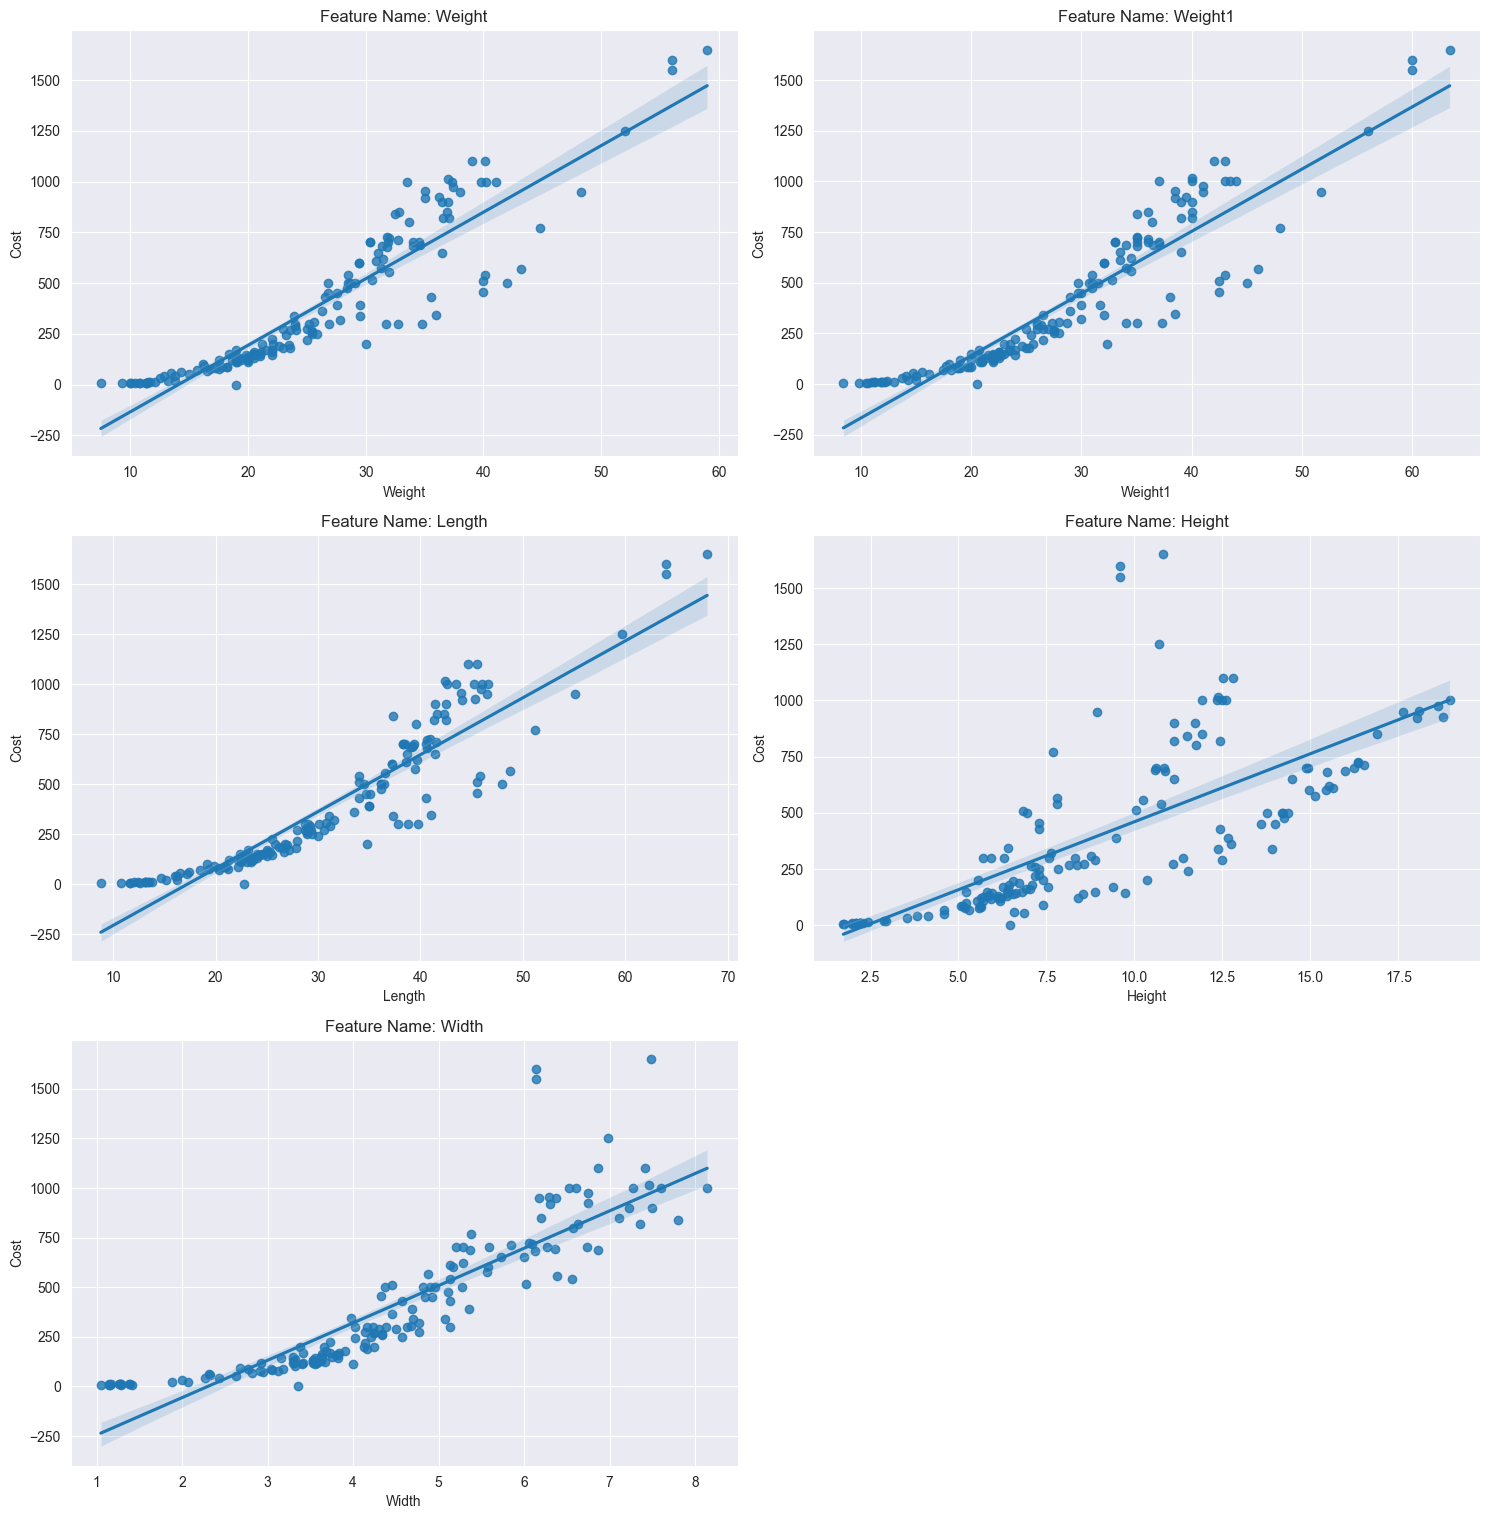

In [10]:
# Set the parameters that control the general style of the plots.
sbn.set_style("darkgrid") 
#dropping dependent feature column
X=dataSet.drop('Cost',axis=1)
# Selecting all independent feature columns names 
columns=X.columns
#Building Box plot for each independent features 
plt.figure(figsize=(15, 30) )
for index, columns_name in enumerate(columns, 1): 
    plt.subplot(6, 2, index) 
    # draw regplot
    sbn.regplot(data=dataSet,x=dataSet[columns_name],y='Cost')
    plt.title("Feature Name: {}".format(columns_name))
plt.tight_layout() 
# show the plot
plt.show() 

## 3.5- Multivariate Analysis - Correaltion

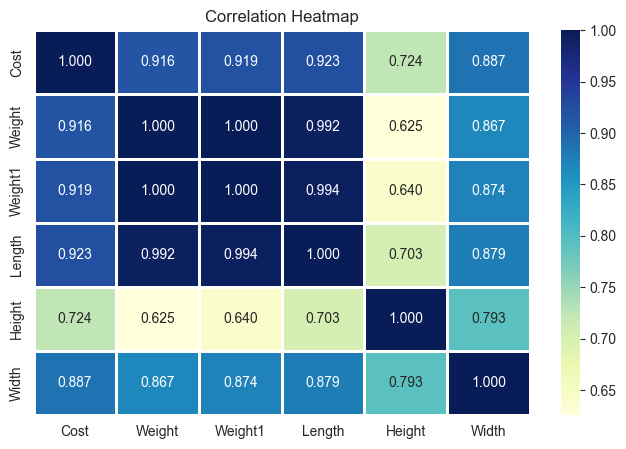

,Cost,Weight,Weight1,Length,Height,Width
Cost,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Weight,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Weight1,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [11]:
plt.figure(figsize=(8, 5)) 
# Using Seaborn to create a heatmap 
sbn.heatmap(dataSet.corr(method='pearson'), annot=True, fmt='.3f', cmap='YlGnBu', linewidths=2) 
plt.title('Correlation Heatmap') 
plt.show() 
dataSet.corr(method='pearson')

## 3.6- Detecting Outlier and Treatment using Inter Quantile Range

In [12]:
outliers = []
var1 = sorted(dataSet['Length'])
q1 = np.percentile(dataSet['Length'], 25)
q3 = np.percentile(dataSet['Length'], 75)
IQR = q3 - q1
upper_IQR = q3 + (1.5 * IQR)
lower_IQR = q1 - (1.5 * IQR)

for i in dataSet['Length']:
    if i < lower_IQR or i > upper_IQR:
        outliers.append(i)
print(outliers)      
arr = np.where(dataSet['Length'].isin(outliers))[0]
print(arr)
# deleting rows where there is outlier
dataSet.drop(index=arr, inplace=True)
print(dataSet.shape)
dataSet.describe()

[68.0]
[144]
(158, 6)


,Cost,Weight,Weight1,Length,Height,Width
count,158.00000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,390.40443,26.039873,28.194304,30.994304,8.959342,4.398103
std,344.85164,9.679323,10.379127,11.268932,4.297309,1.673296
min,0.00000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.00000,19.025000,21.000000,23.125000,5.940600,3.380625
50%,272.50000,25.100000,27.150000,29.350000,7.733000,4.248050
75%,642.50000,32.650000,35.000000,39.575000,12.371850,5.577375
max,1600.00000,56.000000,60.000000,64.000000,18.957000,8.142000


# 4- Model Building

## 4.1 Split data in to features & target

In [13]:
# importing required package
from sklearn.model_selection import train_test_split
# Dropping target columns except length 
X=dataSet.drop(['Cost','Weight','Weight1','Width'],axis=1)
#Dropping all columns except Cost
Y=dataSet['Cost']
#Splitting train & test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.28,random_state=42)

## 4.2- Standard Scalling

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [15]:
Y_train=Y_train.reset_index(drop=True)

## 4.3- Linear Regression Model using OLS

In [16]:
from sklearn.linear_model import LinearRegression
# Fit the model
start_time = datetime.now()
model = LinearRegression()
model.fit(X_train_scaled, Y_train)
OLS_time = datetime.now() - start_time
print(f'Time Taken : {datetime.now() - start_time}')
# Predict on the test set
# Checking  the score & Coef
# on Train Data
print("****On Train Data****")
score = model.score(X_train_scaled, Y_train)
model_Coef=model.coef_
model_Intercept=model.intercept_
print("Model Score: {}".format(score))
print("Model Coef: {}".format(model_Coef))
print("Model Intercept: {}".format(model_Intercept))
Y_pred1 = model.predict(X_train_scaled)
Y_train_data_list = list(Y_train)
# Squared error Calculation
se_sum_train = 0
for i, j in zip( Y_train_data_list, list(Y_pred1)):
  se_sum_train = se_sum_train +  (i - j)**2
OLS_mse_train = se_sum_train/len(Y_train_data_list)
OLS_rmse_train = (se_sum_train / len(Y_train_data_list)) ** .5
print("Model MSE: {}".format(OLS_mse_train))
print("Model RMSE: {}".format(OLS_rmse_train))
# on Test Data
print("****On Test Data****")
Y_pred2 = model.predict(X_test_scaled)
Y_test_data_list = list(Y_test)
# Squared error Calculation
se_sum_test = 0
for i, j in zip( Y_test_data_list, list(Y_pred2)):
  se_sum_test = se_sum_test +  (i - j)**2
OLS_mse_test = se_sum_test/len(Y_test_data_list)
OLS_rmse_test = (se_sum_test / len(Y_test_data_list)) ** .5
print("Model MSE: {}".format(OLS_mse_test))
print("Model RMSE: {}".format(OLS_rmse_test))

Time Taken : 0:00:00.014331
****On Train Data****
Model Score: 0.8576087246820725
Model Coef: [296.58599234  34.45291988]
Model Intercept: 391.1159292035397
Model MSE: 17258.93000889855
Model RMSE: 131.37324692987744
****On Test Data****
Model MSE: 17689.505287412085
Model RMSE: 133.00189956317197


# 5- Evaluate Normal/Batch Gradient Descent

In [17]:
from sklearn.metrics import r2_score
class GDesc:
    def __init__(self,lr=0.01,loops=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = lr
        self.loops = loops
    def fit_gdesc(self,X_train,y_train):
        # Initialization of Intercept and Coeffient
        # intercept is defined as 0 at first and all coefficient are defined as 1 using numpy.ones
        start_time = datetime.now()
        self.intercept = 0
        self.coef = np.ones(X_train.shape[1])
        for i in range(self.loops):
            # intercept and coefficient modified here
            y_pred = np.dot(X_train,self.coef) + self.intercept
            intercept_derivative = -2 * np.mean(y_train - y_pred)
            self.intercept = self.intercept - (self.lr * intercept_derivative)
            
            coef_derivative = -2 * np.dot((y_train - y_pred),X_train)/X_train.shape[0]
            self.coef = self.coef - (self.lr * coef_derivative)
        print(f'Time Taken : {datetime.now() - start_time}')
        time_taken = datetime.now() - start_time
        return self.intercept,self.coef,time_taken
    def predict_gdesc(self,data):
        #  predicting result
        return np.dot(data,self.coef) + self.intercept
# On Training Data----------------------------------------------------------------------------------
# Class Object initialization (Learning Rate and number of epochs defined)
gd_obj = GDesc(loops=2000,lr=0.01) 
# Model Fit
coef,intercept,GD_time = gd_obj.fit_gdesc(X_train_scaled,Y_train)
# Train Data Prediction
y_pred_train_gd = gd_obj.predict_gdesc(X_train_scaled)
# Model Score
GD_score = r2_score(Y_train,y_pred_train_gd)
print('----On Training Data----')
print(f"Model score: {GD_score}")
print(f"Model X Coef :  {coef} ")
print(f"Model Intercept :  {intercept} ")
y_train_data_list = list(Y_train)
# Squared error Calculation
se_sum_train = 0
for i, j in zip( y_train_data_list, list(y_pred_train_gd)):
  se_sum_train = se_sum_train +  (i - j)**2
GD_mse_train = se_sum_train/len(y_train_data_list)
GD_rmse_train = (se_sum_train / len(y_train_data_list)) ** .5
print(f"Model MSE : {GD_mse_train}")
print(f"Model RMSE :  {GD_rmse_train} ")
# On Test Data----------------------------------------------------------------------------------
print('----On Test Data----')
y_pred_test_gd = gd_obj.predict_gdesc(X_test_scaled)
y_test_data_list = list(Y_test)
# Squared error Calculation
se_sum_test = 0
for i, j in zip( y_test_data_list, list(y_pred_test_gd)):
  se_sum_test = se_sum_test +  (i - j)**2
GD_mse_test = se_sum_test/len(y_test_data_list)
GD_rmse_test = (se_sum_test / len(y_test_data_list)) ** .5
print(f"Model MSE : {GD_mse_test}")
print(f"Model RMSE :  {GD_rmse_test} ")

Time Taken : 0:00:00.411563
----On Training Data----
Model score: 0.8576087246629392
Model X Coef :  391.11592920353837 
Model Intercept :  [296.58394218  34.45497005] 
Model MSE : 17258.930011217653
Model RMSE :  131.37324693870383 
----On Test Data----
Model MSE : 17689.270593382404
Model RMSE :  133.00101726446456 


# 6- Stochastic Gradient Descent

In [18]:
from sklearn.metrics import r2_score
class SGDesc:
    def __init__(self,lr=0.01,loops=100):
        self.coef = None
        self.intercept = None
        self.lr = lr
        self.loops = loops
    def fit_sgdesc(self,X_train,y_train):
        # initialize your coeffienct and intercept
        # intercept is defined as 0 at first and all coefficient are defined as 1 using numpy.ones
        start_time = datetime.now()
        self.intercept = 0
        self.coef = np.ones(X_train.shape[1])
        for i in range(self.loops):
            for j in range(X_train.shape[0]):
                indx = np.random.randint(0,X_train.shape[0])
                # intercept and coefficient modified here
                y_hat = np.dot(X_train[indx],self.coef) + self.intercept
                intercept_der = -2 * (y_train[indx] - y_hat)
                self.intercept = self.intercept - (self.lr * intercept_der)
                coef_der = -2 * np.dot((y_train[indx] - y_hat),X_train[indx])
                self.coef = self.coef - (self.lr * coef_der)
        print(f'Time Taken : {datetime.now() - start_time}')
        time_taken = datetime.now() - start_time
        return self.intercept,self.coef,time_taken
    def predict_sgdesc(self,X_test):
        return np.dot(X_test,self.coef) + self.intercept
# On Training Data----------------------------------------------------------------------------------
# Class Object initialization (Learning Rate and number of epochs defined)
sgd_obj = SGDesc(loops=30,lr=0.01)
# Model Fit
coef,intercept,SGD_time = sgd_obj.fit_sgdesc(X_train_scaled,Y_train)
# Train Data Prediction
y_pred_train_sgd = sgd_obj.predict_sgdesc(X_train_scaled)
# # Model Score
SGD_score = r2_score(Y_train,y_pred_train_sgd)
print('----On Training Data----')
print(f"Model score: {SGD_score}")
print(f"Model X Coef :  {coef} ")
print(f"Model Intercept :  {intercept} ")
y_train_data_list = list(Y_train)
# # Squared error Calculation
se_sum_train = 0
for i, j in zip( y_train_data_list, list(y_pred_train_sgd)):
  se_sum_train = se_sum_train +  (i - j)**2
SGD_mse_train = se_sum_train/len(y_train_data_list)
SGD_rmse_train = (se_sum_train / len(y_train_data_list)) ** .5
print(f"Model MSE : {SGD_mse_train}")
print(f"Model RMSE :  {SGD_rmse_train} ")
# On Test Data----------------------------------------------------------------------------------
print('----On Test Data----')
y_pred_test_sgd = sgd_obj.predict_sgdesc(X_test_scaled)
y_test_data_list = list(Y_test)
# Squared error Calculation
se_sum_test = 0
for i, j in zip( y_test_data_list, list(y_pred_test_sgd)):
  se_sum_test = se_sum_test +  (i - j)**2
SGD_mse_test = se_sum_test/len(y_test_data_list)
SGD_rmse_test = (se_sum_test / len(y_test_data_list)) ** .5
print(f"Model MSE : {SGD_mse_test}")
print(f"Model RMSE :  {SGD_rmse_test} ")

Time Taken : 0:00:00.062210
----On Training Data----
Model score: 0.8544513011488418
Model X Coef :  394.6363867083627 
Model Intercept :  [323.63119698  19.60222223] 
Model MSE : 17641.63429781516
Model RMSE :  132.82181408870744 
----On Test Data----
Model MSE : 21083.200572986712
Model RMSE :  145.20055293622926 


# 7- Mini Batch Gradient Descent

In [19]:
import random
class MBGD:
    def __init__(self,batch_size,lr=0.01,loops=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = lr
        self.loops = loops
        self.batch_size = batch_size
    def MBGDfit(self,X_train,y_train):
        # initialize  your coeffient and intercept
        # intercept is defined as 0 at first and all coefficient are defined as 1 using numpy.ones
        start_time = datetime.now()
        print(start_time)
        self.intercept = 0
        self.coef = np.ones(X_train.shape[1])
        for i in range(self.loops):
            for j in range(int(X_train.shape[0]/self.batch_size)):
                idx = random.sample(range(X_train.shape[0]),self.batch_size)
                # intercept and coefficient modified here
                y_hat = np.dot(X_train[idx],self.coef) + self.intercept
                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept = self.intercept - (self.lr * intercept_der)
                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef = self.coef - (self.lr * coef_der)
        print(f'Time Taken : {datetime.now() - start_time}')
        time_taken = datetime.now() - start_time
        return self.intercept,self.coef,time_taken
    def MBGDpredict(self,X_test):
        return np.dot(X_test,self.coef) + self.intercept
# On Training Data----------------------------------------------------------------------------------
# Class Object initialization (Learning Rate and number of epochs defined)
mbr = MBGD(batch_size=int(X_train_scaled.shape[0]/20),lr=0.01,loops=110)
# Model Fit
coef,intercept,MBGD_time = mbr.MBGDfit(X_train_scaled,Y_train)
# Train Data Prediction
y_pred_train_mbgd = mbr.MBGDpredict(X_train_scaled)
# # Model Score
MBGD_score = r2_score(Y_train,y_pred_train_mbgd)
print('----On Training Data----')
print(f"Model score: {MBGD_score}")
print(f"Model X Coef :  {coef} ")
print(f"Model Intercept :  {intercept} ")
y_train_data_list = list(Y_train)
# # Squared error Calculation
se_sum_train = 0
for i, j in zip( y_train_data_list, list(y_pred_train_mbgd)):
  se_sum_train = se_sum_train +  (i - j)**2
MBGD_mse_train = se_sum_train/len(y_train_data_list)
MBGD_rmse_train = (se_sum_train / len(y_train_data_list)) ** .5
print(f"Model MSE : {MBGD_mse_train}")
print(f"Model RMSE :  {MBGD_rmse_train} ")
# On Test Data----------------------------------------------------------------------------------
print('----On Test Data----')
y_pred_test_mbgd = mbr.MBGDpredict(X_test_scaled)
y_test_data_list = list(Y_test)
# Squared error Calculation
se_sum_test = 0
for i, j in zip( y_test_data_list, list(y_pred_test_mbgd)):
  se_sum_test = se_sum_test +  (i - j)**2
MBGD_mse_test = se_sum_test/len(y_test_data_list)
MBGD_rmse_test = (se_sum_test / len(y_test_data_list)) ** .5
print(f"Model MSE : {MBGD_mse_test}")
print(f"Model RMSE :  {MBGD_rmse_test} ")

2025-04-02 19:59:36.889241
Time Taken : 0:00:03.068320
----On Training Data----
Model score: 0.8542685783353698
Model X Coef :  393.72254084856866 
Model Intercept :  [281.48227797  62.40615036] 
Model MSE : 17663.781723924672
Model RMSE :  132.90516063691686 
----On Test Data----
Model MSE : 16347.004392054861
Model RMSE :  127.85540423484203 


# Final Result Summary

In [20]:
results = {
    "Model": ["SGD", "Mini Batch", "Batch", "Normal Equation"],
    "MSE": [SGD_mse_test, MBGD_mse_test, GD_mse_test, OLS_mse_test],
    "RMSE": [SGD_rmse_test, MBGD_rmse_test, GD_rmse_test, OLS_rmse_test],
    "R2 Score": [SGD_score, MBGD_score, GD_score, score],
    "Time Taken in Seconds": [SGD_time.total_seconds(),MBGD_time.total_seconds(),GD_time.total_seconds(),OLS_time.total_seconds()]
}
results_df = pd.DataFrame(results)
results_df

,Model,MSE,RMSE,R2 Score,Time Taken in Seconds
0,SGD,21083.200573,145.200553,0.854451,0.062210
1,Mini Batch,16347.004392,127.855404,0.854269,3.068320
2,Batch,17689.270593,133.001017,0.857609,0.411563
3,Normal Equation,17689.505287,133.001900,0.857609,0.014331


# Observation & Explanation :
1- All 4 regression models are performing similarly and has similar R^2 scores.

2- OLS method is performing little better and also taking lesser time than other models.

3- OLS and Normal Gradient descent have lesser RMSE and MSE than other two models.

4- From the Box Plot, outliers have been found for Length, Weight and weigh1 variables.

5- From the correlation heatmap, it is noticed that Length has more association with Cost or target variable than other independent variables and   
   Length is inter correlated with Weight, Weight1, Width very strongly. 
   
6- Hence, Length and Height have been taken as final model features to predict Cost.
